In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train = pd.read_csv('train_val.csv')

# Data Overview

In [4]:
train.head()

,ID,tweet,labels
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed


In [5]:
train.shape

(9921, 3)

In [6]:
#train.labels.nunique()

In [7]:
#train.groupby(['labels'])['ID'].count().sort_values(ascending= False)

In [8]:
#train.groupby(['labels'])['ID'].count().sort_values(ascending= False)[0:11]

In [9]:
train.isna().sum()

ID        0
tweet     0
labels    0
dtype: int64

# Label Distribution

In [10]:
# Define a function to split the words
def split_words(row):
    return row.split(' ')

In [11]:
train['label_list'] = train['labels'].apply(split_words)

In [12]:
train.head()

,ID,tweet,labels,label_list
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,[ingredients]
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,[side-effect]
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,[side-effect]
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,[mandatory]
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,"[side-effect, rushed]"


In [13]:
train.explode(['label_list']).groupby(['label_list'])['ID'].count().sort_values(ascending= False)

label_list
side-effect    3805
ineffective    1672
rushed         1477
pharma         1273
mandatory       783
unnecessary     722
none            629
political       626
conspiracy      487
ingredients     436
country         201
religious        64
Name: ID, dtype: int64

In [14]:
train['label_len'] = train['label_list'].apply(len)

In [15]:
train['label_len'].value_counts()

1    7936
2    1716
3     269
Name: label_len, dtype: int64

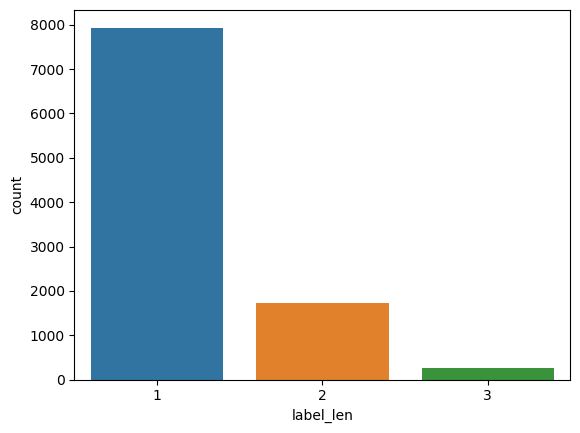

In [16]:
# sns.countplot(train['label_len'])
sns.countplot(data=train, x='label_len')
plt.show()

In [17]:
# Select 10 random rows
random_rows = train['tweet'].sample(n=10)

for row in random_rows:
    print('------------')
    print(row)

------------
@NBCNews Imagine taking the vaccine and thinking that you are immune, next thing you know but you got covid-19 and taking an anal test
------------
SHOCKING: Man’s Skin Burns, Swells, Then Peels Off In Severe Reaction To Johnson & Johnson Covid Vaccine - The True Reporter https://t.co/TJ1dfwakxW
------------
So the vaccine it's either making is sick, giving us COVID, or plain and simply killing us... And NOW THIS! FDA recalls more hand sanitizers over potentially dangerous chemicals https://t.co/WHsIXCaYyT #FoxBusiness
------------
@SecAzar @US_FDA We don’t blame Trump, we blame you!!!! You have no back bone! All you care about is how much income you and your buddies will get from the vaccine!!
------------
@impressionist81 ➡️➡️➡️ 1) In this paper the Pfizer COVID-19 vaccine was evaluated for the potential to induce prion-based disease in vaccine recipients. The RNA sequence of the vaccine as well as the spike protein target interaction were analyzed for the potential to c

# Tweet Length

In [18]:
train['tweet_len'] = train['tweet'].apply(lambda x: len(x.split()))

In [19]:
train.head()

,ID,tweet,labels,label_list,label_len,tweet_len
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,[ingredients],1,17
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,[side-effect],1,24
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,[side-effect],1,49
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,[mandatory],1,55
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,"[side-effect, rushed]",2,42


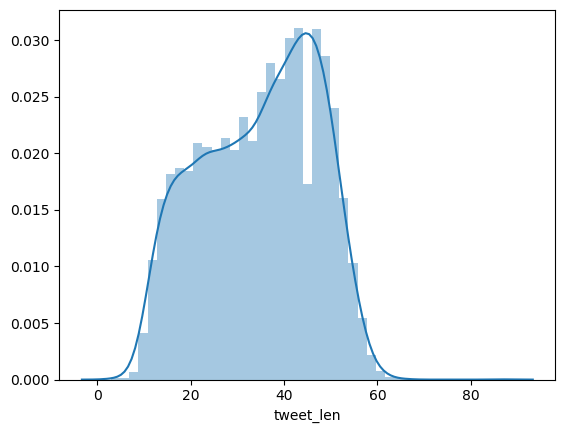

In [20]:
sns.distplot(train['tweet_len'])
plt.show()

## Are longer tweets associated with certain labels more than others?

In [21]:
train.explode(['label_list']).groupby(['label_list'])['tweet_len'].mean().sort_values(ascending = False)

label_list
unnecessary    38.738227
political      38.599042
rushed         38.111036
conspiracy     37.882957
ineffective    37.519737
pharma         36.656716
mandatory      35.975734
ingredients    35.243119
side-effect    34.258344
religious      33.031250
country        31.129353
none           25.817170
Name: tweet_len, dtype: float64

# Word Frequency Analysis

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
import re

In [25]:
# Remove unwanted characters
train['clean_tweets'] = train['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # remove punctuation
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: re.sub(r'@\w+', '', x))  # remove handles
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: re.sub(r'#\w+', '', x))  # remove hashtags
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: re.sub(r'&\w+', '', x))  # remove words starting with &

In [26]:
# Convert to lowercase
train['clean_tweets'] = train['clean_tweets'].str.lower()

# Tokenize the tweets
train['tokens'] = train['clean_tweets'].apply(word_tokenize)

In [27]:
# You might want to remove stopwords (common words like 'the', 'is', etc. that often don't carry much meaning)
stop_words = set(stopwords.words('english'))

train['tokens'] = train['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [28]:
# Group by label, and within each group, concatenate all the token lists together, then count the occurrences of each word
common_words = train.explode(['label_list']).groupby('label_list')['tokens'].sum().apply(lambda tokens: Counter(tokens).most_common(20))

#print(common_words)

In [29]:
for label, words in common_words.items():
    print('------------')
    print(f"Label: {label}")
    for word, count in words:
        print(f"   {word}: {count}")

------------
Label: conspiracy
   vaccine: 423
   covid: 165
   gates: 112
   people: 103
   vaccines: 84
   covid19: 83
   virus: 73
   pfizer: 71
   world: 68
   get: 67
   bill: 65
   moderna: 62
   us: 55
   take: 53
   corona: 46
   one: 45
   dont: 45
   population: 44
   dna: 44
   like: 43
------------
Label: country
   vaccine: 248
   russian: 88
   chinese: 52
   take: 38
   covid: 31
   covid19: 27
   dont: 27
   us: 24
   china: 24
   would: 23
   like: 23
   get: 22
   vaccines: 22
   im: 21
   trust: 19
   even: 19
   russia: 19
   one: 18
   people: 17
   taking: 17
------------
Label: ineffective
   vaccine: 1863
   covid: 559
   pfizer: 383
   vaccines: 315
   people: 303
   get: 288
   effective: 282
   virus: 280
   vaccinated: 222
   still: 213
   dont: 211
   covid19: 208
   flu: 187
   even: 179
   efficacy: 179
   one: 176
   doesnt: 164
   getting: 157
   work: 153
   know: 148
------------
Label: ingredients
   vaccine: 447
   vaccines: 99
   covid: 89
   pfize

# Co-occurance of Labels

In [30]:
from sklearn.preprocessing import MultiLabelBinarizer

In [31]:
# Convert lists of labels into a binary matrix
mlb = MultiLabelBinarizer()
labels_matrix = mlb.fit_transform(train['label_list'])

In [32]:
# Convert binary matrix into a DataFrame
labels_df = pd.DataFrame(labels_matrix, columns=mlb.classes_)

In [33]:
# Compute co-occurrence matrix
co_occurrence_matrix = labels_df.T.dot(labels_df)

In [34]:
print(co_occurrence_matrix)

             conspiracy  country  ineffective  ingredients  mandatory  none  \
conspiracy          487        7           14           79         27     0   
country               7      201           15            2          5     0   
ineffective          14       15         1672           19         35     0   
ingredients          79        2           19          436         20     0   
mandatory            27        5           35           20        783     0   
none                  0        0            0            0          0   629   
pharma               97        5           51           23         29     0   
political            34       12           18            8         37     0   
religious             5        1            0           17          4     0   
rushed               26       23          112           28         58     0   
side-effect         116       17          182          101         71     0   
unnecessary          32        4           78       

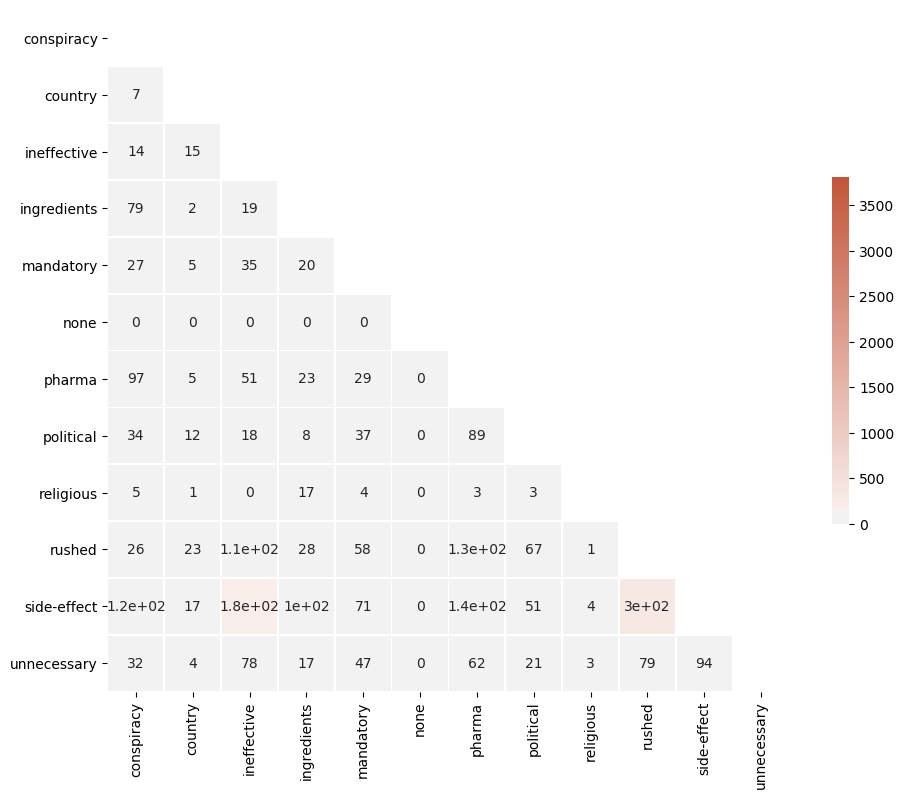

In [35]:
mask = np.triu(np.ones_like(co_occurrence_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(co_occurrence_matrix, mask=mask, cmap=cmap, vmax=None, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

# Sentiment Analysis

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
# Download the vader_lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
# Assuming df is your DataFrame and 'tweets' is the column with the text of the tweets
train['sentiment_scores'] = train['tweet'].apply(lambda tweet: sia.polarity_scores(tweet))

# You can split the dictionary of scores into separate columns
train = pd.concat([train.drop(['sentiment_scores'], axis=1), train['sentiment_scores'].apply(pd.Series)], axis=1)

In [39]:
# 'neg' for negative sentiment, 'neu' for neutral sentiment, 'pos' for positive sentiment, and 'compound' for the aggregated sentiment.

# The sentiment scores range from -1 to 1 for 'compound' (where -1 is extremely negative and 1 is extremely positive), and 
# 0 to 1 for 'neg', 'neu', and 'pos' (which add up to 1). 

In [40]:
train.head()

,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,[ingredients],1,17,cath__kath astrazeneca is made with the kidney...,"[cath__kath, astrazeneca, made, kidney, cells,...",0.000,1.000,0.000,0.0000
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,[side-effect],1,24,it begins please find safe alternatives to thi...,"[begins, please, find, safe, alternatives, vac...",0.171,0.658,0.171,0.0000
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,[side-effect],1,49,paolaqp1231 well i mean congratulations covid1...,"[paolaqp1231, well, mean, congratulations, cov...",0.027,0.856,0.117,0.6808
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,[mandatory],1,55,borisjohnson for those of us that do not wish ...,"[borisjohnson, us, wish, vaccine, given, vacci...",0.038,0.834,0.128,0.7385
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,"[side-effect, rushed]",2,42,she has been trying to speak out writing lette...,"[trying, speak, writing, letters, government, ...",0.097,0.903,0.000,-0.4939


In [41]:
average_sentiment = train.explode(['label_list']).groupby('label_list')['compound'].mean()

print(average_sentiment)

label_list
conspiracy    -0.152121
country       -0.027262
ineffective   -0.050121
ingredients   -0.096524
mandatory     -0.098390
none          -0.057131
pharma        -0.047567
political     -0.125577
religious     -0.180167
rushed        -0.051898
side-effect   -0.265099
unnecessary   -0.113949
Name: compound, dtype: float64


In [42]:
train.to_csv('train_modified.csv')

In [43]:
train_modified = pd.read_csv('train_modified.csv')

In [44]:
train_modified.shape

(9921, 13)

In [45]:
from sklearn.model_selection import train_test_split

# Assuming df is your original DataFrame

# Split the DataFrame into train and validation sets
train_df, val_df = train_test_split(train_modified, test_size=0.2, random_state=42)

# Print the number of rows in each set
print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))

Train set size: 7936
Validation set size: 1985


In [46]:
train_df.to_csv('train_df.csv')
val_df.to_csv('val_df.csv')

In [47]:
train_df.head()

,Unnamed: 0,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
1477,1477,1352994869556350977t,#TRUSTCCP? Do you trust the Chinese Communist ...,country,['country'],1,32,trustccp do you trust the chinese communist pa...,"['trustccp', 'trust', 'chinese', 'communist', ...",0.035,0.679,0.286,0.8738
1790,1790,1364574998397132805t,@hannah62687 @mgtalbott @DrTomFrieden For many...,ineffective unnecessary,"['ineffective', 'unnecessary']",2,50,hannah62687 mgtalbott drtomfrieden for many ge...,"['hannah62687', 'mgtalbott', 'drtomfrieden', '...",0.139,0.756,0.105,-0.2295
2615,2615,1334085299945807873t,Imagine if the covid vaccine has a side effect...,side-effect,['side-effect'],1,17,imagine if the covid vaccine has a side effect...,"['imagine', 'covid', 'vaccine', 'side', 'effec...",0.000,1.000,0.000,0.0000
6969,6969,1321645107183980544t,"@GreyHaired07 and yet, every other year we are...",mandatory,['mandatory'],1,31,greyhaired07 and yet every other year we are r...,"['greyhaired07', 'yet', 'every', 'year', 'remi...",0.151,0.849,0.000,-0.5859
7172,7172,1432922183337066498t,#VAERS 17y♂️#Pfizer #Covidvaccine #Suicide att...,side-effect,['side-effect'],1,45,vaers 17ypfizer covidvaccine suicide attempt p...,"['vaers', '17ypfizer', 'covidvaccine', 'suicid...",0.092,0.857,0.051,-0.4588


# Baseline Model

## tf-idf 

In [50]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

In [51]:
# Text pre-processing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from text
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [52]:
train_df['tweet'] = train_df['tweet'].apply(preprocess_text)
val_df['tweet'] = val_df['tweet'].apply(preprocess_text)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [52]:
# Fit and transform the vectorizer on the train set, and only transform the vectorizer on the test set
tfidf_train = tfidf_vectorizer.fit_transform(train_df['tweet']) 
tfidf_test = tfidf_vectorizer.transform(val_df['tweet'])

In [53]:
print(tfidf_train.shape)
print(tfidf_test.shape)

(7936, 15616)
(1985, 15616)


In [54]:
# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names()

In [55]:
# Sum tfidf frequency of each term through documents
sums = tfidf_train.sum(axis=0)

# Connecting term and sum frequency
data = []
for col, term in enumerate(feature_names):
    data.append( (term, sums[0,col] ))

In [56]:
ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False))

            term        rank
3663       covid  225.916205
10403     pfizer  187.450874
10324     people  168.070074
3667     covid19  139.466598
14712   vaccines  139.198034
...          ...         ...
674         6mon    0.156619
25           025    0.156619
9218   multidose    0.156619
1757       avian    0.153288
6503        h5n1    0.153288

[15616 rows x 2 columns]


In [57]:
import ast

y_train = train_df['label_list'].apply(ast.literal_eval)
y_test = val_df['label_list'].apply(ast.literal_eval)

## Naive Bayes

In [58]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize the labels for multi-label classification
mlb = MultiLabelBinarizer()
y_train_binarized = mlb.fit_transform(y_train)
y_test_binarized = mlb.transform(y_test)

# Initialize the OneVsRestClassifier with MultinomialNB
clf = OneVsRestClassifier(MultinomialNB())

# Fit the model
clf.fit(tfidf_train, y_train_binarized)

# Predict the test set
predictions = clf.predict(tfidf_test)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# Ensure that y_test and predictions are binary arrays
y_test_array = np.array(y_test_binarized)
predictions_array = np.array(predictions)

# Accuracy
print('Accuracy: ', accuracy_score(y_test_array, predictions_array))

# Precision
print('Precision: ', precision_score(y_test_array, predictions_array, average='micro'))

# Recall
print('Recall: ', recall_score(y_test_array, predictions_array, average='micro'))

# F1 score
print('F1 score: ', f1_score(y_test_array, predictions_array, average='micro'))

# Jaccard score
print('Jaccard score: ', jaccard_score(y_test_array, predictions_array, average='micro'))

Accuracy:  0.18841309823677582
Precision:  0.9372197309417041
Recall:  0.16998779991866614
F1 score:  0.28777969018932875
Jaccard score:  0.16807398472054685


In [60]:
mlb.classes_

array(['conspiracy', 'country', 'ineffective', 'ingredients', 'mandatory',
       'none', 'pharma', 'political', 'religious', 'rushed',
       'side-effect', 'unnecessary'], dtype=object)

In [61]:
y_test_array[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [62]:
predictions_array[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
val_df.iloc[1]

Unnamed: 0                                                    510
ID                                           1355176268879306752t
tweet            vaccinating young people 40 with 0005 risk fr...
labels                                         pharma unnecessary
label_list                              ['pharma', 'unnecessary']
label_len                                                       2
tweet_len                                                      45
clean_tweets    bbcbreaking vaccinating young people 40 with 0...
tokens          ['bbcbreaking', 'vaccinating', 'young', 'peopl...
neg                                                         0.214
neu                                                         0.722
pos                                                         0.064
compound                                                   -0.759
Name: 510, dtype: object

## DNNtfidf_train

In [17]:
!pip install tensorflow

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model parameters
input_dim = tfidf_train.shape[1]  # Number of features
num_classes = y_train_binarized.shape[1]  # Number of classes

# Define your model architecture
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))  # For multi-label classification, we use a sigmoid activation function in the output layer

# Compile your model with loss, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
#history = model.fit(tfidf_train, y_train_binarized, epochs=10, verbose=1, validation_data=(tfidf_test, y_test_binarized))

history = model.fit(tfidf_train.toarray(), y_train_binarized, epochs=10, verbose=1, validation_data=(tfidf_test.toarray(), y_test_binarized))

Epoch 1/10
248/248 [==============================] - 7s 24ms/step - loss: 0.3422 - accuracy: 0.2544 - val_loss: 0.2576 - val_accuracy: 0.3436
Epoch 2/10
248/248 [==============================] - 5s 21ms/step - loss: 0.2240 - accuracy: 0.4786 - val_loss: 0.2101 - val_accuracy: 0.5103
Epoch 3/10
248/248 [==============================] - 5s 21ms/step - loss: 0.1567 - accuracy: 0.6426 - val_loss: 0.1946 - val_accuracy: 0.5683
Epoch 4/10
248/248 [==============================] - 6s 23ms/step - loss: 0.1041 - accuracy: 0.7632 - val_loss: 0.1996 - val_accuracy: 0.5652
Epoch 5/10
248/248 [==============================] - 5s 22ms/step - loss: 0.0672 - accuracy: 0.8267 - val_loss: 0.2192 - val_accuracy: 0.5738
Epoch 6/10
248/248 [==============================] - 6s 23ms/step - loss: 0.0449 - accuracy: 0.8580 - val_loss: 0.2424 - val_accuracy: 0.5743
Epoch 7/10
248/248 [==============================] - 5s 21ms/step - loss: 0.0321 - accuracy: 0.8717 - val_loss: 0.2653 - val_accuracy: 0.5617

In [46]:
# Evaluate the model
loss, accuracy = model.evaluate(tfidf_test.toarray(), y_test_binarized, verbose=False)
print(f'Testing Accuracy:  {accuracy}')

Testing Accuracy:  0.5576826333999634


In [ ]:
# class level metrics - error analysis, are wrong going to other type

# Glove Embedding

In [8]:
import pandas as pd
import numpy as np
import re
import string

# from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

In [9]:
train_df = pd.read_csv('train_df.csv')
val_df = pd.read_csv('val_df.csv')

train_df.head()

,Unnamed: 0,Unnamed: 0.1,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
0,1477,1477,1352994869556350977t,#TRUSTCCP? Do you trust the Chinese Communist ...,country,['country'],1,32,trustccp do you trust the chinese communist pa...,"['trustccp', 'trust', 'chinese', 'communist', ...",0.035,0.679,0.286,0.8738
1,1790,1790,1364574998397132805t,@hannah62687 @mgtalbott @DrTomFrieden For many...,ineffective unnecessary,"['ineffective', 'unnecessary']",2,50,hannah62687 mgtalbott drtomfrieden for many ge...,"['hannah62687', 'mgtalbott', 'drtomfrieden', '...",0.139,0.756,0.105,-0.2295
2,2615,2615,1334085299945807873t,Imagine if the covid vaccine has a side effect...,side-effect,['side-effect'],1,17,imagine if the covid vaccine has a side effect...,"['imagine', 'covid', 'vaccine', 'side', 'effec...",0.000,1.000,0.000,0.0000
3,6969,6969,1321645107183980544t,"@GreyHaired07 and yet, every other year we are...",mandatory,['mandatory'],1,31,greyhaired07 and yet every other year we are r...,"['greyhaired07', 'yet', 'every', 'year', 'remi...",0.151,0.849,0.000,-0.5859
4,7172,7172,1432922183337066498t,#VAERS 17y♂️#Pfizer #Covidvaccine #Suicide att...,side-effect,['side-effect'],1,45,vaers 17ypfizer covidvaccine suicide attempt p...,"['vaers', '17ypfizer', 'covidvaccine', 'suicid...",0.092,0.857,0.051,-0.4588


In [10]:
df = pd.concat([train_df,val_df])
df.shape

(9921, 14)

In [11]:
# text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('amp', '', text)
    return text
df['tweet'] = df['tweet'].apply(lambda x: clean_text(x))

In [12]:
# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['tweet']=df['tweet'].apply(lambda x: remove_emoji(x))

## Preparing the Data

In [13]:
# create a corpus using all the tweets in train and validation data
def create_corpus(df):
    corpus=[]
    for tweet in df['tweet']:
        corpus.append(tweet)
    return corpus
corpus=create_corpus(df)

In [14]:
# create an embedding dictionary using gloVe
# convert texts to sequences and pad them
embedding_dict={}
with open('glove/glove.twitter.27B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)
tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [15]:
# see how many unique words do we have in the corpus
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 23383


In [16]:
# create an embedding matrix
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))
for word,i in word_index.items():
    if i > num_words:
        continue
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

In [22]:
import ast

y_train = train_df['label_list'].apply(ast.literal_eval)
y_val = val_df['label_list'].apply(ast.literal_eval)

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize the labels for multi-label classification
mlb = MultiLabelBinarizer()
y_train_binarized = mlb.fit_transform(y_train)
y_val_binarized = mlb.transform(y_val)

In [24]:
# Define model parameters
input_dim = num_words  # Number of features
num_classes = y_train_binarized.shape[1]  # Number of classes

model=Sequential()
embedding=Embedding(input_dim,100,embeddings_initializer=Constant(embedding_matrix),
input_length=MAX_LEN,trainable=False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='sigmoid'))
optimzer=Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [25]:
train_final=tweet_pad[:train_df.shape[0]]
val_final=tweet_pad[train_df.shape[0]:]

In [26]:
# Train your model
history = model.fit(train_final, y_train_binarized, epochs=10, verbose=1, validation_data=(val_final, y_val_binarized))

Epoch 1/10
248/248 [==============================] - 16s 57ms/step - loss: 0.6904 - accuracy: 0.0929 - val_loss: 0.6815 - val_accuracy: 0.0670
Epoch 2/10
248/248 [==============================] - 14s 56ms/step - loss: 0.6724 - accuracy: 0.0789 - val_loss: 0.6530 - val_accuracy: 0.0453
Epoch 3/10
248/248 [==============================] - 15s 59ms/step - loss: 0.6217 - accuracy: 0.0641 - val_loss: 0.5413 - val_accuracy: 0.0549
Epoch 4/10
248/248 [==============================] - 14s 56ms/step - loss: 0.4664 - accuracy: 0.0953 - val_loss: 0.3961 - val_accuracy: 0.1118
Epoch 5/10
248/248 [==============================] - 14s 56ms/step - loss: 0.3738 - accuracy: 0.2477 - val_loss: 0.3525 - val_accuracy: 0.2902
Epoch 6/10
248/248 [==============================] - 14s 56ms/step - loss: 0.3411 - accuracy: 0.2916 - val_loss: 0.3318 - val_accuracy: 0.2952
Epoch 7/10
248/248 [==============================] - 14s 56ms/step - loss: 0.3242 - accuracy: 0.2956 - val_loss: 0.3197 - val_accuracy:

In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(val_final, y_val_binarized, verbose=False)
print(f'Testing Accuracy:  {accuracy}')

Testing Accuracy:  0.29622167348861694
